# Edinburgh cycle hire data

Until a few weeks ago (unfortunately!), Edinburgh had a bike hire scheme, where you could rent a bike from one station to another. The company which ran the scheme published anonymised data every month, containing all information about the bike trips people have made that month.

All available data files (since the scheme started in September 2018) are available [here](https://edinburghcyclehire.com/open-data/historical), as well as a description of the data. It is published under the [Open Government License (OGL)](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

The data file for July 2021 is in this folder (`07.csv`).

---

Some questions we could investigate:

- What is the average journey time and distance of bike trips on weekdays? What about weekends?
- How many stations appear in the dataset? Which were the most common starting stations?
- What was the most common time(s) of day for journeys to be undertaken?

---

Useful documentation:

- [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime)
- [The `.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#dt-accessor)
- [Time and date components](https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components)
- Relational plots: [`sns.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html)
- Categorical plots: [`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html)
- Distribution plots: [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html)

In [9]:
import pandas as pd

trips = pd.read_csv('07.csv')
trips.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-07-01 00:06:40.633000+00:00,2021-07-01 00:31:13.327000+00:00,1472,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185,1729,McDonald Road,Next to Fire Station,55.964031,-3.185175
1,2021-07-01 00:09:05.813000+00:00,2021-07-01 00:18:37.419000+00:00,571,1052,Surgeons Hall,East side of Nicolson Street,55.946643,-3.185475,1749,Dean Street,Corner of Dean Park Mews,55.957278,-3.214285
2,2021-07-01 00:29:16.151000+00:00,2021-07-01 01:00:58.224000+00:00,1902,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395
3,2021-07-01 00:36:00.185000+00:00,2021-07-01 01:04:08.705000+00:00,1688,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986
4,2021-07-01 00:37:13.872000+00:00,2021-07-01 01:01:59.244000+00:00,1485,1721,Tollcross,Outside Piccolinos off Lauriston Place,55.944248,-3.203105,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395


In [6]:
trips['duration'].mean() / 60

32.53021454460423

In [ ]:
trips.info()

In [17]:
# Convert first 2 columns to datetime objects
trips['started_at'] = pd.to_datetime(trips['started_at'])
trips['ended_at'] = pd.to_datetime(trips['ended_at'])

# Display some properties of the datetime objects
trips['started_at'][0].dayofweek

3

In [21]:
# Create a new column to indicate the day of the week
trips['day_of_week'] = trips['started_at'].dt.dayofweek
trips.tail()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,day_of_week
11399,2021-07-31 23:46:33.308000+00:00,2021-08-01 00:01:28.832000+00:00,895,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246,258,Stockbridge,Hamilton Place by Dean Bank Lane,55.958566,-3.208070,5
11400,2021-07-31 23:50:02.642000+00:00,2021-07-31 23:58:50.684000+00:00,528,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965176,-3.176180,5
11401,2021-07-31 23:54:54.719000+00:00,2021-08-01 00:06:35.941000+00:00,701,1722,Cramond Foreshore,Near Cramond Beach,55.980031,-3.300642,1722,Cramond Foreshore,Near Cramond Beach,55.980031,-3.300642,5
11402,2021-07-31 23:55:44.291000+00:00,2021-08-01 00:07:11.259000+00:00,686,1722,Cramond Foreshore,Near Cramond Beach,55.980031,-3.300642,1722,Cramond Foreshore,Near Cramond Beach,55.980031,-3.300642,5
11403,2021-07-31 23:58:16.144000+00:00,2021-08-01 00:15:35.242000+00:00,1039,1748,Colinton Road,Near Napier University Merchiston Campus,55.933416,-3.212397,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,5


In [24]:
# Calculate average trip duration on weekends
trips.loc[trips['day_of_week'] >= 5, 'duration'].mean() / 60

trips.loc[trips['day_of_week'] < 5, 'duration'].mean() / 60

30.86108918873048

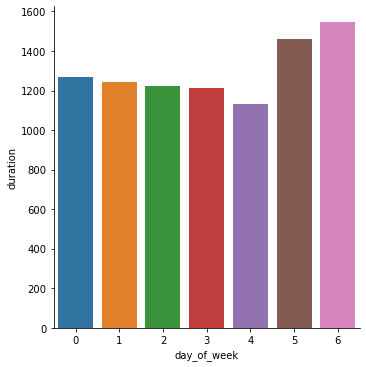

In [30]:
import seaborn as sns
from numpy import median

grid = sns.catplot(data=trips,
                   x='day_of_week',
                   y='duration',
                   kind='bar',
                   ci=None,
                   estimator=median)

<IPython.core.display.Javascript object>


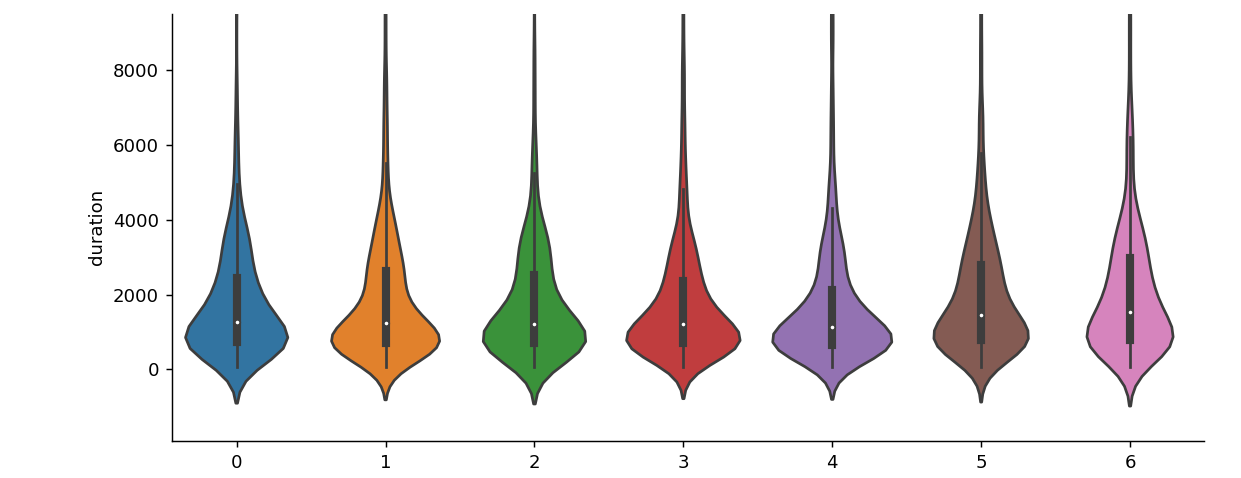

In [36]:
%matplotlib notebook

grid = sns.catplot(data=trips,
                   kind='violin',
                   x='day_of_week',
                   y='duration',
                   ylim=[0, 10000])

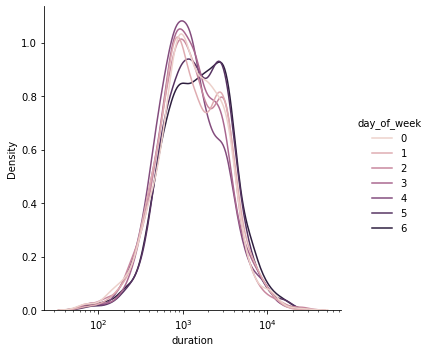

In [45]:
%matplotlib inline
grid = sns.displot(data=trips,
                   x='duration',
                   hue='day_of_week',
                   kind='kde',
                   log_scale=True,
                   common_norm=False)